In [7]:
import os
import sys
import plotly.graph_objects as go
import pandas as pd
from datetime import date, timedelta

caminho_commons = os.path.join('..', '..', 'ajna_docs', 'commons')
caminho_virasana = os.path.join('..', '..', 'ajna_docs', 'virasana')
sys.path.append(caminho_commons)
sys.path.append('..')
sys.path.append(caminho_virasana)

In [8]:
from bhadrasana.models import engine


In [15]:
SQL_TGs = \
'''
SELECT year(tg.create_date) as Ano, month(tg.create_date) as Mês, 
count(tg.id) as QtdeTGs, sum(tg.valor) as ValorTotal
  FROM ovr_ovrs ovr
 inner join ovr_tgovr tg on ovr.id = tg.ovr_id
 where ovr.setor_id in (1, 2)
 group by year(tg.create_date), month(tg.create_date);'''
SQL_APREENSOES = \
'''
SELECT year(ovr.datahora) as Ano, month(ovr.datahora) as Mês,
  count(a.id) as Qtde, sum(a.peso) as Peso
  FROM ovr_ovrs ovr
 inner join ovr_verificacoesfisicas rvf on rvf.ovr_id = ovr.id
 inner join ovr_apreensoes_rvf a on a.rvf_id = rvf.id
 inner join ovr_tiposapreensao t on t.id = a.tipo_id
 where ovr.setor_id in (1, 2, 3)
 group by year(ovr.datahora), month(ovr.datahora);'''


In [16]:
SQL = SQL_APREENSOES
df = pd.read_sql(SQL, engine)
df.head()

,Ano,Mês,Qtde,Peso
0,2020,7,3,1239.0
1,2020,8,2,249.0
2,2020,9,4,1124.0
3,2020,10,5,1052.0
4,2020,11,5,1452.0


In [26]:
df.Ano.unique()

array([2020, 2021, 2022], dtype=int64)

<ipython-input-40-f639ca45afd4>:5: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



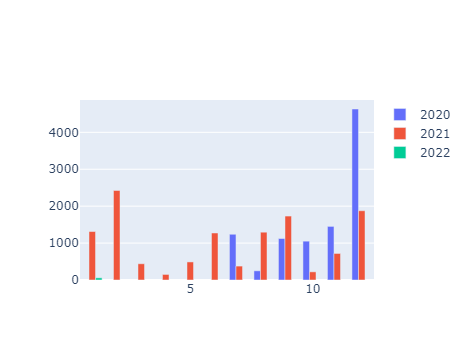

In [40]:
data = []
for ano in df.Ano.unique():
    df_filter = df[df.Ano==ano]
    x = list(df_filter['Mês'].values)
    y = list(df_filter[df.Ano==ano].Peso.values)
    bar = go.Bar(name=str(ano), x=x, y=y)
    data.append(bar)
fig = go.Figure(data=data)
fig.show()

<ipython-input-42-e00291c1f318>:6: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



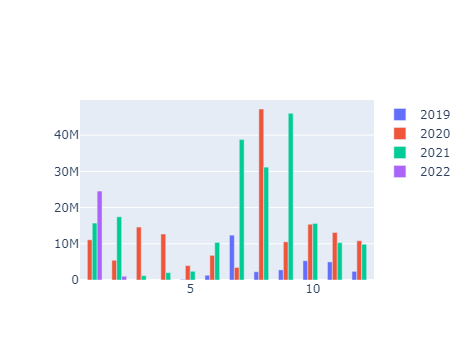

In [42]:
df = pd.read_sql(SQL_TGs, engine)
data = []
for ano in df.Ano.unique():
    df_filter = df[df.Ano==ano]
    x = list(df_filter['Mês'].values)
    y = list(df_filter[df.Ano==ano].ValorTotal.values)
    bar = go.Bar(name=str(ano), x=x, y=y)
    data.append(bar)
fig = go.Figure(data=data)
fig.show()